In [1]:
library(httr)
library(ggplot2)
library(rjson)
library(caret)
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization

Warning message:
"package 'httr' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:httr':

    progress


Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  2.1.3     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.3     

Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'stringr' was built 

In [6]:
API_ENDPOINT <- "http://spotify-user-liked.herokuapp.com/"
API_KEY <- "BQCmDtQGp928KB5OcJ86PqgCgk4T1BcJp4Ymwqlg3x_opLRDMZYlVbBaHl-bqL7_UrNDjBC1VNsn0vYW4JLUQErA3DYvLNw_OmYkXDhVPFUP84kQxJC8ttHhGY3HIlWGYLg2-uXCV64ROj7RKY1ISOE9d6s-KVLVPeV6wFUy0jpMGSNIQHhAH_TmQ9GA5ynSSoiCBx18KXDpcEK_KpLD0ux7FAg-eiEoN_413qWmCVZ0ZS8hdUfgu3UPRKPmiJDBrMLaGibg0mg"

In [7]:
r <- GET(paste(API_ENDPOINT, API_KEY, sep=""))

In [10]:
data <- content(r)

In [2]:
df <- read.csv('./datasets/song_data.csv')
df

X,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_name,artist,danceability
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
0,0.9910,7,-4.167,0.1330,8.46e-05,8.43e-05,0.1200,0.1060,124.016,Mercy,The Ghost Inside,0.444
1,0.6160,10,-8.468,0.0373,2.43e-01,2.97e-06,0.1340,0.2190,78.673,If I Gave Myself To Someone Else,The Coronas,0.303
2,0.6270,7,-6.029,0.0644,1.31e-01,0.00e+00,0.0852,0.5240,120.963,Still Got Time,ZAYN,0.748
3,0.9890,5,-4.172,0.0483,1.02e-01,7.48e-01,0.0551,0.6840,127.984,Yee - Original Mix,Deorro,0.732
4,0.0334,8,-31.460,0.0474,9.85e-01,5.61e-01,0.1140,0.0683,80.816,Jasmine Runs Away,Alan Menken,0.182
5,0.8460,9,-4.581,0.0778,7.38e-04,1.25e-06,0.0530,0.7640,132.997,Heart and Soul,Kevin Jonas,0.605
6,0.6640,0,-9.303,0.0406,1.77e-01,3.22e-03,0.1270,0.7310,104.594,LLorÃ¡ndote,Nelson Y Sus Estrellas,0.634
7,0.3130,6,-7.729,0.0475,6.67e-01,0.00e+00,0.0883,0.4340,49.835,I've Been Waiting,The Intermission Project,0.547
8,0.5170,5,-6.486,0.0309,5.51e-01,0.00e+00,0.1760,0.3550,140.301,I Hear A Symphony - Mono Version,The Supremes,0.554


In [95]:
features <- data.frame(df$energy, df$loudness, df$speechiness, df$acousticness, df$instrumentalness, df$liveness, df$valence, df$tempo)
labels <- data.frame(df$X, df$track_name, df$artist)

In [31]:
summary(features)

   df.energy       df.loudness      df.speechiness    df.acousticness 
 Min.   :0.0000   Min.   :-60.000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.4780   1st Qu.: -9.496   1st Qu.:0.03480   1st Qu.:0.0186  
 Median :0.6670   Median : -6.850   Median :0.04790   Median :0.1310  
 Mean   :0.6325   Mean   : -7.869   Mean   :0.08845   Mean   :0.2732  
 3rd Qu.:0.8220   3rd Qu.: -5.064   3rd Qu.:0.09070   3rd Qu.:0.4770  
 Max.   :1.0000   Max.   :  2.766   Max.   :0.96200   Max.   :0.9960  
 df.instrumentalness  df.liveness       df.valence        df.tempo    
 Min.   :0.000000    Min.   :0.0000   Min.   :0.0000   Min.   :  0.0  
 1st Qu.:0.000000    1st Qu.:0.0959   1st Qu.:0.2760   1st Qu.: 98.8  
 Median :0.000018    Median :0.1280   Median :0.4660   Median :120.8  
 Mean   :0.103760    Mean   :0.2001   Mean   :0.4787   Mean   :121.5  
 3rd Qu.:0.008190    3rd Qu.:0.2550   3rd Qu.:0.6767   3rd Qu.:140.0  
 Max.   :0.999000    Max.   :1.0000   Max.   :1.0000   Max.   :232.7  

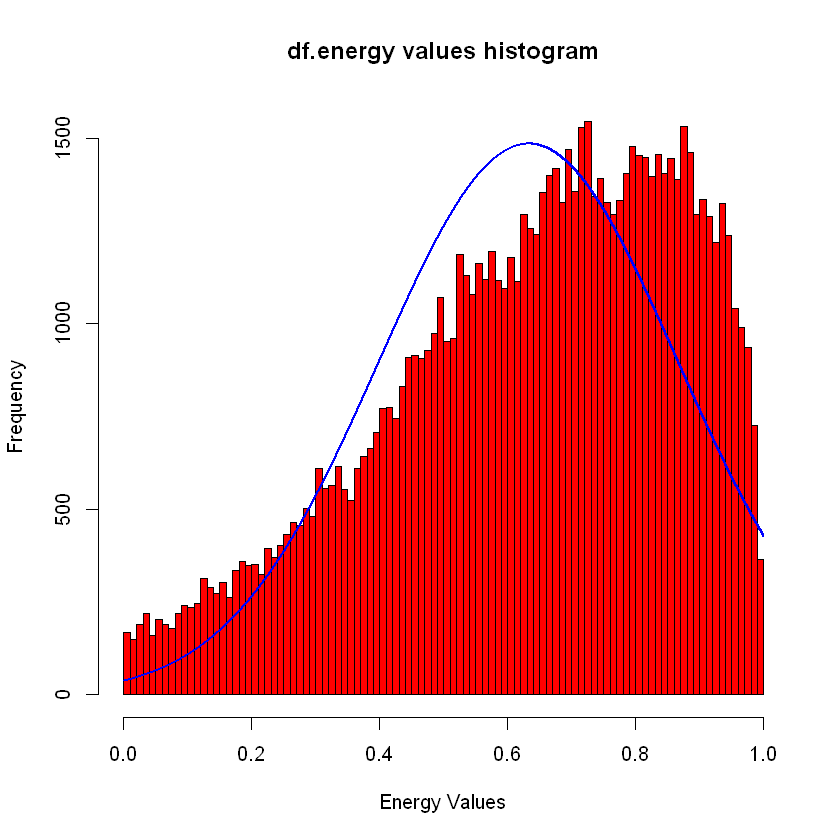

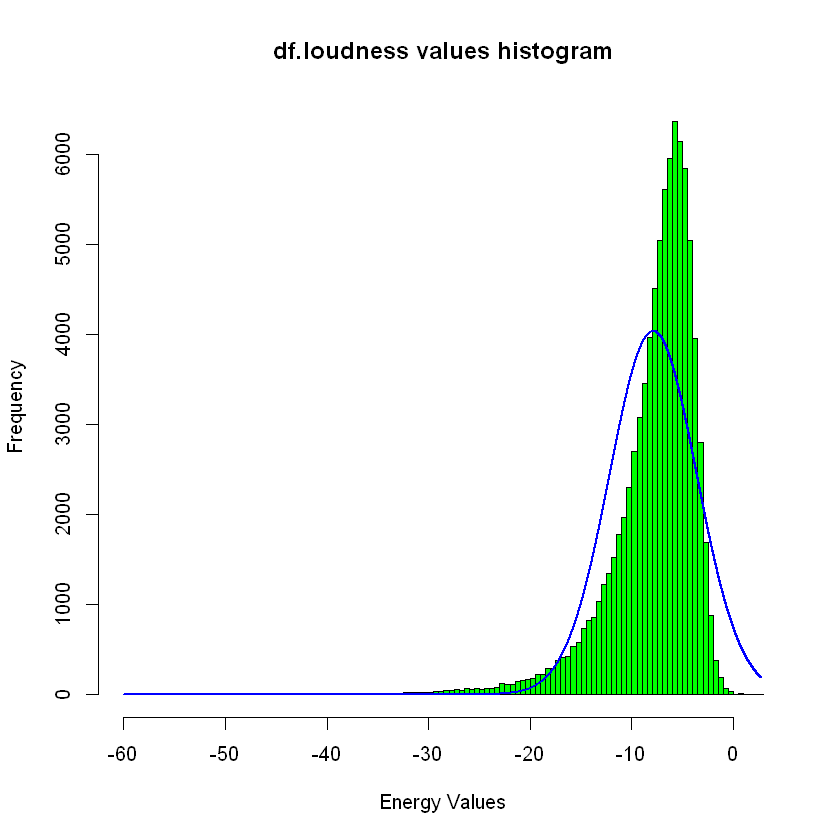

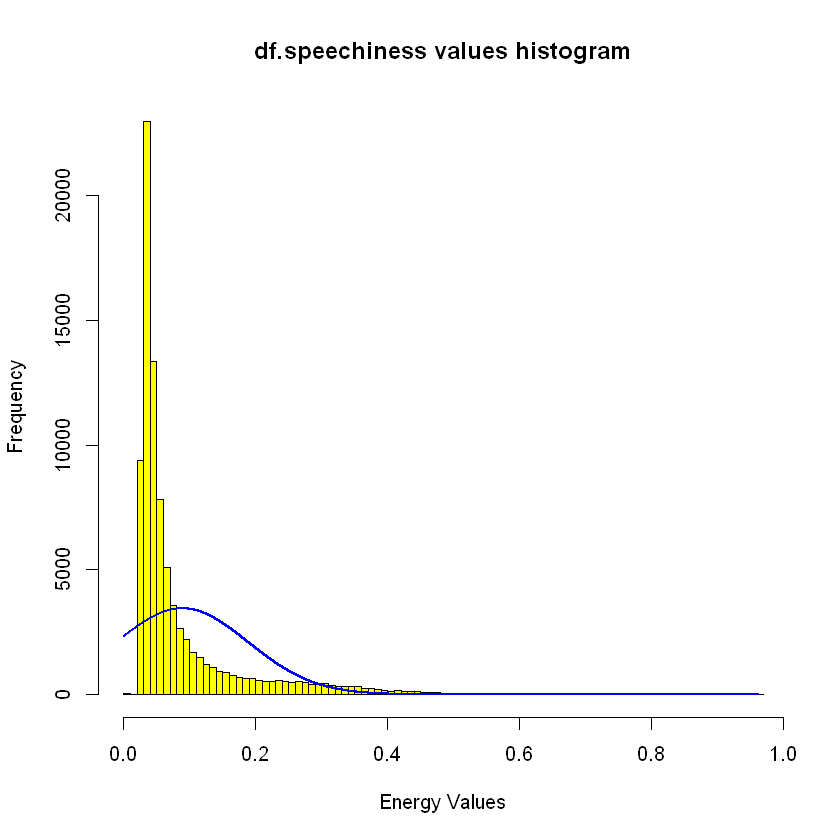

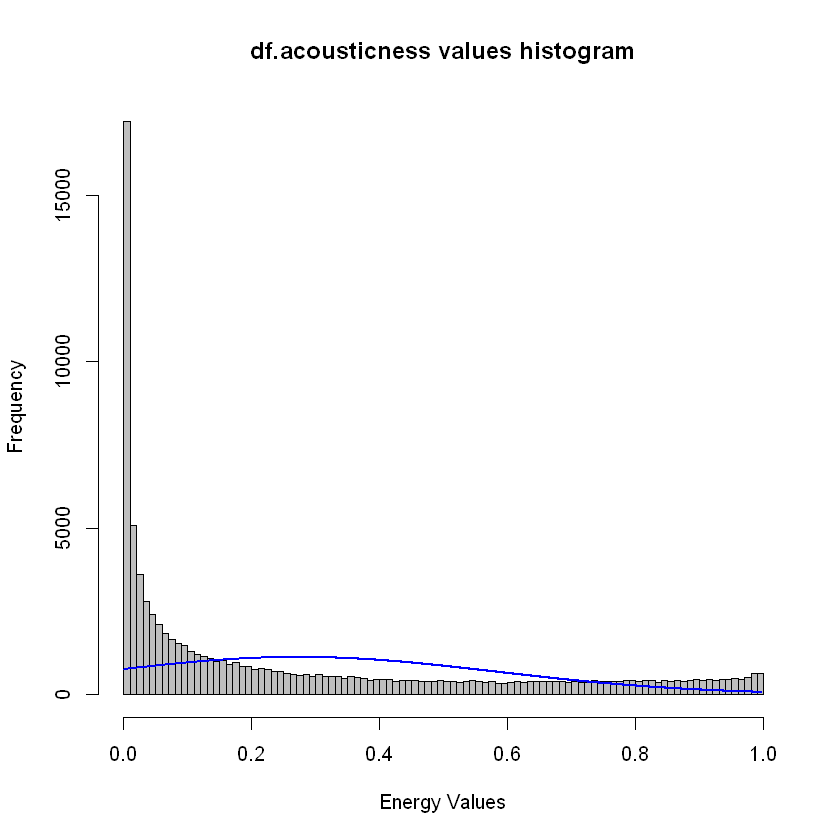

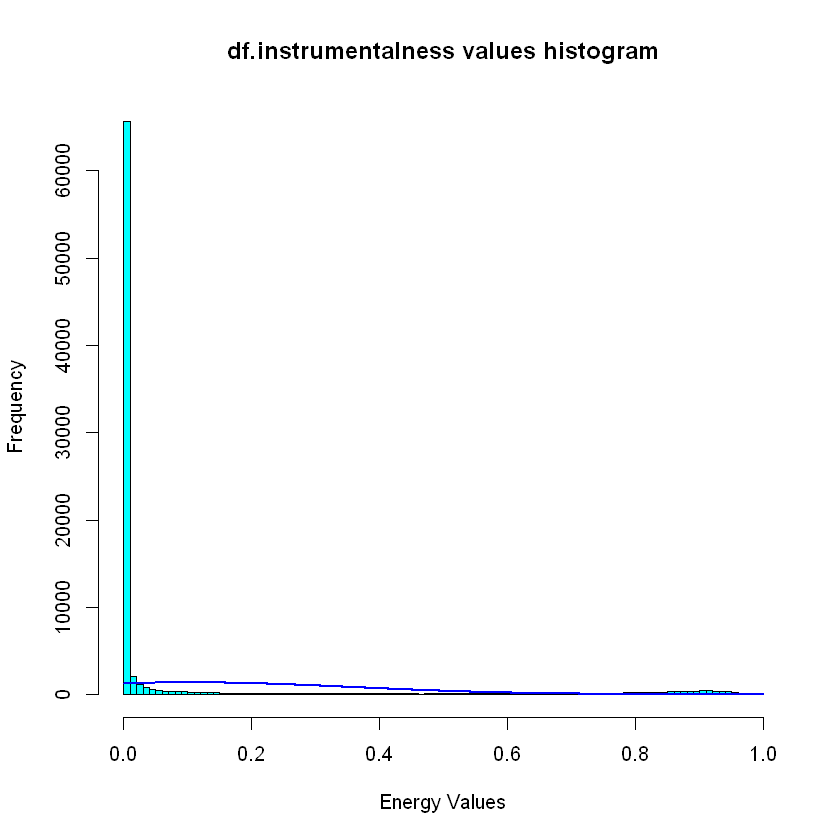

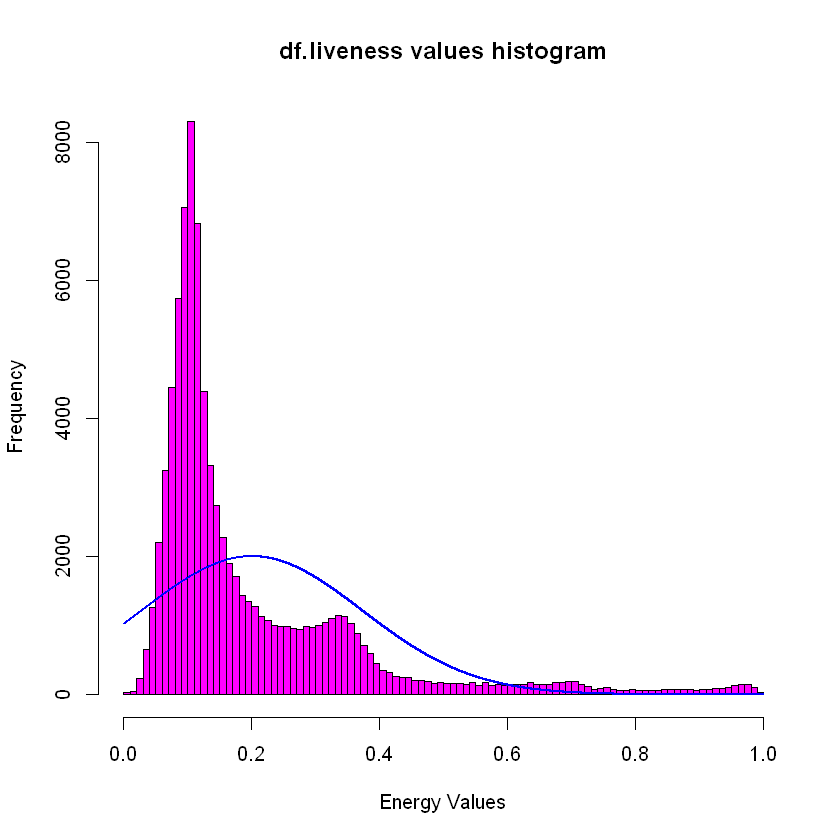

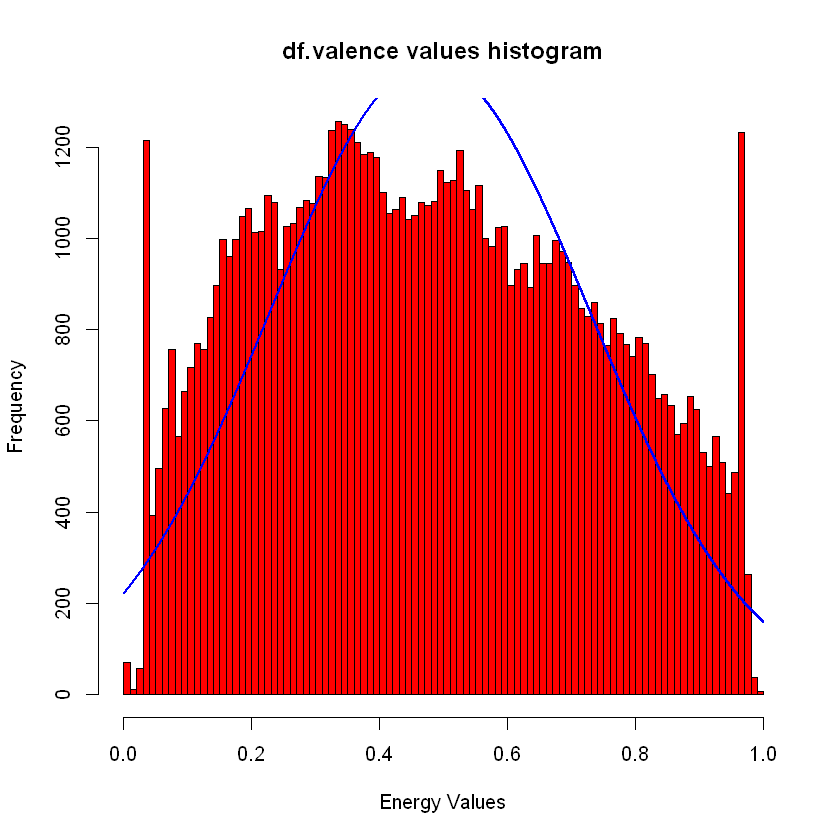

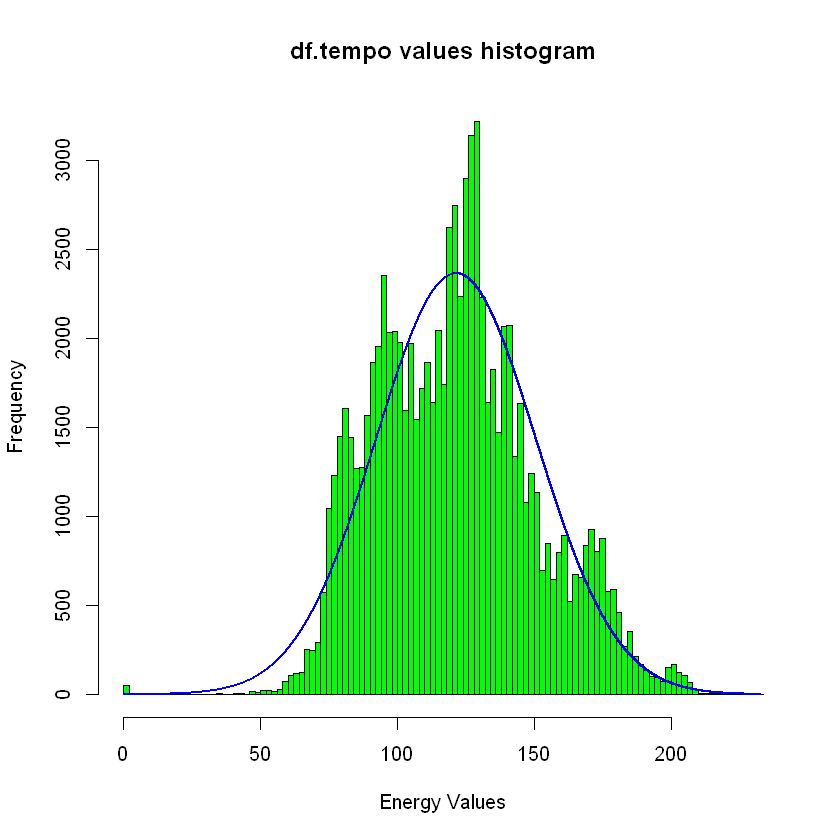

In [43]:
colors = rep(c("red", "green", "yellow", "gray", "cyan", "magenta"), 3)
for (i in c(1:ncol(features))) {
   x <- features[,i]
    h<-hist(x, breaks=120, col=colors[i], xlab="Energy Values",
       main=paste(colnames(features)[i], "values histogram"))
    xfit<-seq(min(x),max(x),length=nrow(features))
    yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
    yfit <- yfit*diff(h$mids[1:2])*length(x)
    lines(xfit, yfit, col="blue", lwd=2) 
}

In [33]:
# data is not normalized
preproc <- preProcess(features, method=c("center", "scale"))
norm <- predict(preproc, features)
summary(norm)

   df.energy        df.loudness       df.speechiness     df.acousticness  
 Min.   :-2.7154   Min.   :-12.1665   Min.   :-0.88151   Min.   :-0.8865  
 1st Qu.:-0.6633   1st Qu.: -0.3796   1st Qu.:-0.53469   1st Qu.:-0.8262  
 Median : 0.1481   Median :  0.2379   Median :-0.40413   Median :-0.4615  
 Mean   : 0.0000   Mean   :  0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.8136   3rd Qu.:  0.6547   3rd Qu.: 0.02242   3rd Qu.: 0.6611  
 Max.   : 1.5778   Max.   :  2.4821   Max.   : 8.70588   Max.   : 2.3451  
 df.instrumentalness  df.liveness        df.valence          df.tempo       
 Min.   :-0.4104     Min.   :-1.1575   Min.   :-1.91296   Min.   :-4.15461  
 1st Qu.:-0.4104     1st Qu.:-0.6029   1st Qu.:-0.80997   1st Qu.:-0.77657  
 Median :-0.4103     Median :-0.4172   Median :-0.05067   Median :-0.02354  
 Mean   : 0.0000     Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.:-0.3780     3rd Qu.: 0.3173   3rd Qu.: 0.79155   3rd Qu.: 0.63131  
 Max.   : 3.5

In [37]:
dat_scaled <- data.frame(scale(features))
dat_scaled

df.energy,df.loudness,df.speechiness,df.acousticness,df.instrumentalness,df.liveness,df.valence,df.tempo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.53911516,0.86409161,0.44398287,-0.88626744,-0.41004367,-0.46346956,-1.48934683,0.08553201
-0.07082055,-0.13969550,-0.50977302,-0.09811093,-0.41036534,-0.38249907,-1.03776309,-1.46475988
-0.02359577,0.42952951,-0.23969168,-0.46150300,-0.41037708,-0.66473904,0.18111338,-0.01885105
1.53052883,0.86292468,-0.40014591,-0.55559559,2.54801015,-0.83882558,0.82052398,0.22119922
-2.57201666,-5.50567389,-0.40911540,2.30936152,1.80841334,-0.49817119,-1.64000796,-1.39149002
0.91660668,0.76747039,-0.10614592,-0.88414744,-0.41037214,-0.85097115,1.14022929,0.39259531
0.13525122,-0.33457162,-0.47688489,-0.31225268,-0.39764178,-0.42298431,1.00835085,-0.57851248
-1.37164860,0.03277571,-0.40811879,1.27758761,-0.41037708,-0.64680986,-0.17855509,-2.45074046
-0.49584358,0.32287275,-0.57355607,0.90121726,-0.41037708,-0.13958762,-0.49426408,0.64232144


In [38]:
# we need to split our data into training and testing data
test_ratio <- 0.2
test_index <- floor(test_ratio * nrow(dat_scaled))
test_data <- dat_scaled[1:test_index,]
train_data <- dat_scaled[test_index:nrow(dat_scaled),]
print(paste("Test Data Size", nrow(test_data)))
print(paste("Train Data Size", nrow(train_data)))

[1] "Test Data Size 17343"
[1] "Train Data Size 69376"


In [39]:
# KMeans algorithm for clustering
k <- kmeans(train_data, centers = 2, nstart = 25)
str(k)

List of 9
 $ cluster     : Named int [1:69376] 2 2 1 2 2 1 1 2 1 2 ...
  ..- attr(*, "names")= chr [1:69376] "17343" "17344" "17345" "17346" ...
 $ centers     : num [1:2, 1:8] -1.294 0.44 -1.126 0.386 -0.299 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:8] "df.energy" "df.loudness" "df.speechiness" "df.acousticness" ...
 $ totss       : num 554245
 $ withinss    : num [1:2] 133612 292186
 $ tot.withinss: num 425798
 $ betweenss   : num 128447
 $ size        : int [1:2] 17639 51737
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [40]:
k

K-means clustering with 2 clusters of sizes 17639, 51737

Cluster means:
   df.energy df.loudness df.speechiness df.acousticness df.instrumentalness
1 -1.2942732   -1.126070     -0.2989621       1.2940660           0.4567664
2  0.4398721    0.386091      0.1035219      -0.4381952          -0.1592476
  df.liveness df.valence   df.tempo
1 -0.20297301 -0.6168691 -0.3071055
2  0.06994581  0.2107896  0.1041420

Clustering vector:
17343 17344 17345 17346 17347 17348 17349 17350 17351 17352 17353 17354 17355 
    2     2     1     2     2     1     1     2     1     2     2     2     2 
17356 17357 17358 17359 17360 17361 17362 17363 17364 17365 17366 17367 17368 
    2     2     2     2     1     2     1     2     2     2     2     2     2 
17369 17370 17371 17372 17373 17374 17375 17376 17377 17378 17379 17380 17381 
    2     1     1     2     2     2     1     2     2     1     1     2     2 
17382 17383 17384 17385 17386 17387 17388 17389 17390 17391 17392 17393 17394 
    2     2     1 

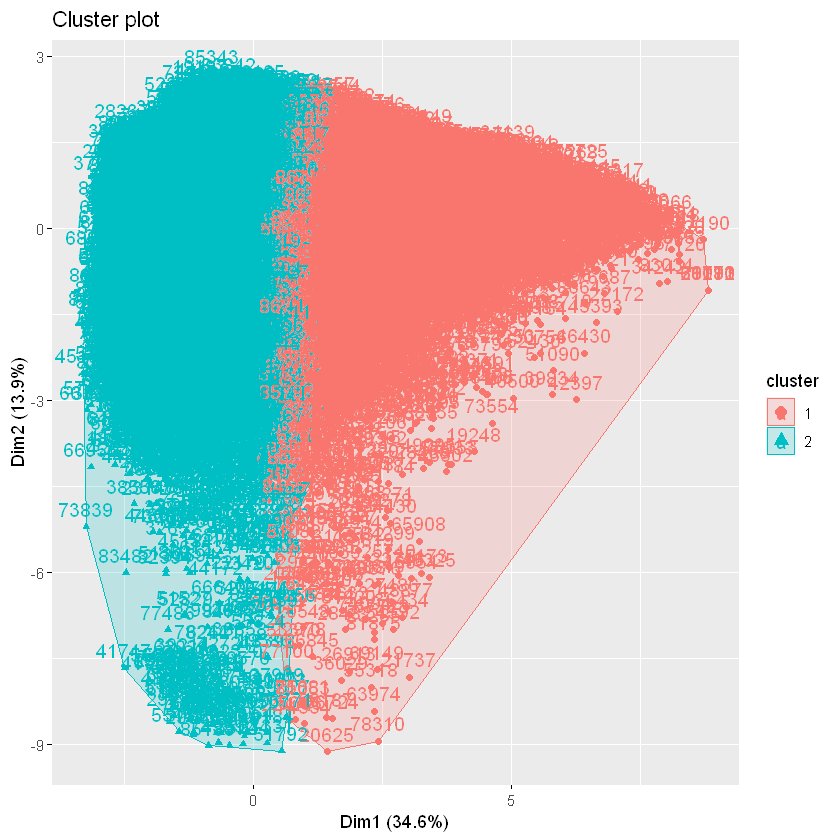

In [41]:
fviz_cluster(k2, data = train_data)

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3468800)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3468800)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 3468800)"
Warning message:
"package 'gridExtra' was built under R version 3.6.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




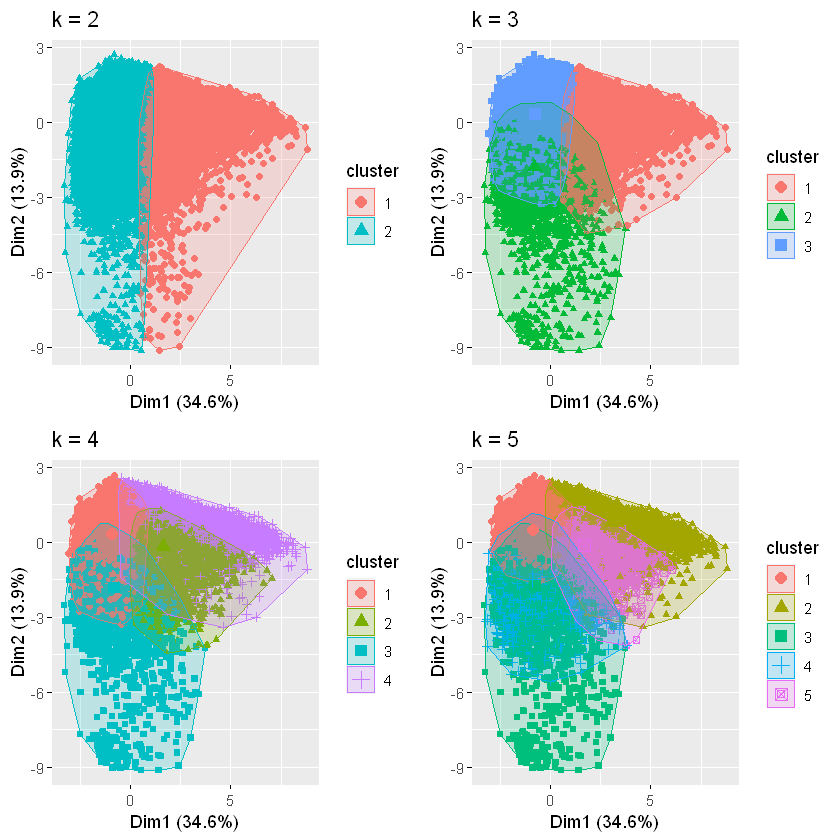

In [42]:
k3 <- kmeans(train_data, centers = 3, nstart = 25)
k4 <- kmeans(train_data, centers = 4, nstart = 25)
k5 <- kmeans(train_data, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = train_data) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = train_data) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = train_data) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = train_data) + ggtitle("k = 5")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [50]:
# most of the songs are clustered into 3 main clusters, the rest seem to be just intersections
# hence our optimal k value is 3
cluster <- k3$cluster
cluster

17343 17344 17345 17346 17347 17348 17349 17350 17351 17352 17353 17354 17355 
    2     2     3     2     2     3     3     2     3     2     2     2     2 
17356 17357 17358 17359 17360 17361 17362 17363 17364 17365 17366 17367 17368 
    2     2     2     1     3     2     3     2     2     2     1     2     2 
17369 17370 17371 17372 17373 17374 17375 17376 17377 17378 17379 17380 17381 
    2     3     3     2     2     2     3     2     2     3     3     1     2 
17382 17383 17384 17385 17386 17387 17388 17389 17390 17391 17392 17393 17394 
    2     2     3     3     2     3     2     2     2     2     3     2     2 
17395 17396 17397 17398 17399 17400 17401 17402 17403 17404 17405 17406 17407 
    2     3     2     2     2     2     2     3     1     2     2     3     2 
17408 17409 17410 17411 17412 17413 17414 17415 17416 17417 17418 17419 17420 
    3     2     2     3     3     2     2     2     1     2     2     2     2 
17421 17422 17423 17424 17425 17426 17427 17428 17429 17430 17431 17432 17433 
    2     1     2     1     3     1     2     3     3     2     2     3     3 
17434 17435 17436 17437 17438 17439 17440 17441 17442 17443 17444 17445 17446 
    2     2     2     2     3     3     2     2     2     3     1     2     3 
17447 17448 17449 17450 17451 17452 17453 17454 17455 17456 17457 17458 17459 
    2     3     2     2     2     2     3     1     1     2     2     2     2 
17460 17461 17462 17463 17464 17465 17466 17467 17468 17469 17470 17471 17472 
    3     2     2     3     2     3     2     2     1     2     2     2     2 
17473 17474 17475 17476 17477 17478 17479 17480 17481 17482 17483 17484 17485 
    1     2     3     2     3     2     2     2     2     2     1     2     2 
17486 17487 17488 17489 17490 17491 17492 17493 17494 17495 17496 17497 17498 
    2     2     2     2     2     2     2     2     2     2     3     2     2 
17499 17500 17501 17502 17503 17504 17505 17506 17507 17508 17509 17510 17511 
    2     3     2     2     2     2     3     2     2     2     2     2     2 
17512 17513 17514 17515 17516 17517 17518 17519 17520 17521 17522 17523 17524 
    3     2     2     2     3     3     3     2     2     1     3     2     2 
17525 17526 17527 17528 17529 17530 17531 17532 17533 17534 17535 17536 17537 
    3     2     2     2     3     2     2     2     2     2     2     1     2 
17538 17539 17540 17541 17542 17543 17544 17545 17546 17547 17548 17549 17550 
    2     2     2     2     2     2     2     2     2     2     2     2     3 
17551 17552 17553 17554 17555 17556 17557 17558 17559 17560 17561 17562 17563 
    1     2     2     2     1     2     2     2     2     3     2     2     2 
17564 17565 17566 17567 17568 17569 17570 17571 17572 17573 17574 17575 17576 
    3     2     3     2     2     1     2     2     2     2     2     2     3 
17577 17578 17579 17580 17581 17582 17583 17584 17585 17586 17587 17588 17589 
    2     1     2     2     2     2     3     2     2     2     2     2     2 
17590 17591 17592 17593 17594 17595 17596 17597 17598 17599 17600 17601 17602 
    2     2     2     1     3     2     2     2     2     2     2     1     2 
17603 17604 17605 17606 17607 17608 17609 17610 17611 17612 17613 17614 17615 
    2     2     2     3     2     2     2     2     3     2     2     1     3 
17616 17617 17618 17619 17620 17621 17622 17623 17624 17625 17626 17627 17628 
    2     1     1     3     2     2     3     1     2     3     2     3     3 
17629 17630 17631 17632 17633 17634 17635 17636 17637 17638 17639 17640 17641 
    2     2     2     2     2     3     3     2     2     2     2     2     1 
17642 17643 17644 17645 17646 17647 17648 17649 17650 17651 17652 17653 17654 
    3     3     3     2     2     3     2     2     3     2     3     2     3 
17655 17656 17657 17658 17659 17660 17661 17662 17663 17664 17665 17666 17667 
    2     2     2     2     3     3     2     2     2     2     2     2     2 
17668 17669 17670 17671 17672 17673 17674 17675 17

In [68]:
# now we see which cluster the test_data belong to and recommend songs belonging to the same cluster
test_k3 <- kmeans(test_data, centers=3, nstart=25)
test_clusters <- test_k3$cluster
test_clusters

1     2     3     4     5     6     7     8     9    10    11    12    13 
    2     2     2     2     3     2     2     3     2     2     3     3     2 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    2     2     2     2     3     2     2     2     2     2     2     2     2 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    2     3     2     2     2     2     2     1     1     1     1     1     1 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    2     2     3     2     2     3     2     2     2     3     2     2     3 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    2     2     2     2     2     1     2     2     2     1     1     3     3 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    2     2     3     2     2     2     2     3     1     2     1     2     2 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    3     3     2     2     3     3     2     2     2     2     3     2     3 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    2     2     2     2     2     2     2     2     2     2     1     3     2 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    3     2     2     2     2     1     3     2     2     2     1     2     2 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    3     1     2     3     2     1     2     2     3     2     2     2     2 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    2     2     3     3     2     2     2     1     2     2     2     2     1 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    2     2     2     2     1     2     3     3     3     3     2     2     2 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
    2     2     3     2     2     2     2     3     2     1     1     2     3 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
    1     2     2     2     2     2     3     3     2     2     2     2     2 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
    3     2     2     2     3     2     2     1     2     3     1     2     2 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
    2     1     3     2     3     3     2     3     2     2     3     2     2 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
    2     3     3     2     3     3     3     2     1     2     2     1     2 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
    3     2     2     2     2     2     2     1     2     3     2     2     3 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
    3     2     2     2     2     3     3     2     2     2     2     2     3 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
    3     2     3     1     3     2     2     1     2     2     2     2     1 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
    2     2     2     2     2     2     3     1     3     3     1     2     2 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
    3     2     2     2     2     2     2     3     2     1     3     2     1 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
    3     3     2     2     2     3     3     3     2     3     2     1     1 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
    2     2     2     2     3     2     2     2     3     2     2     2     1 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
    2     2     3     2     2     2     2     2     3     2     2     2     2 
  326   327   328   329   330   331   332   333   334 

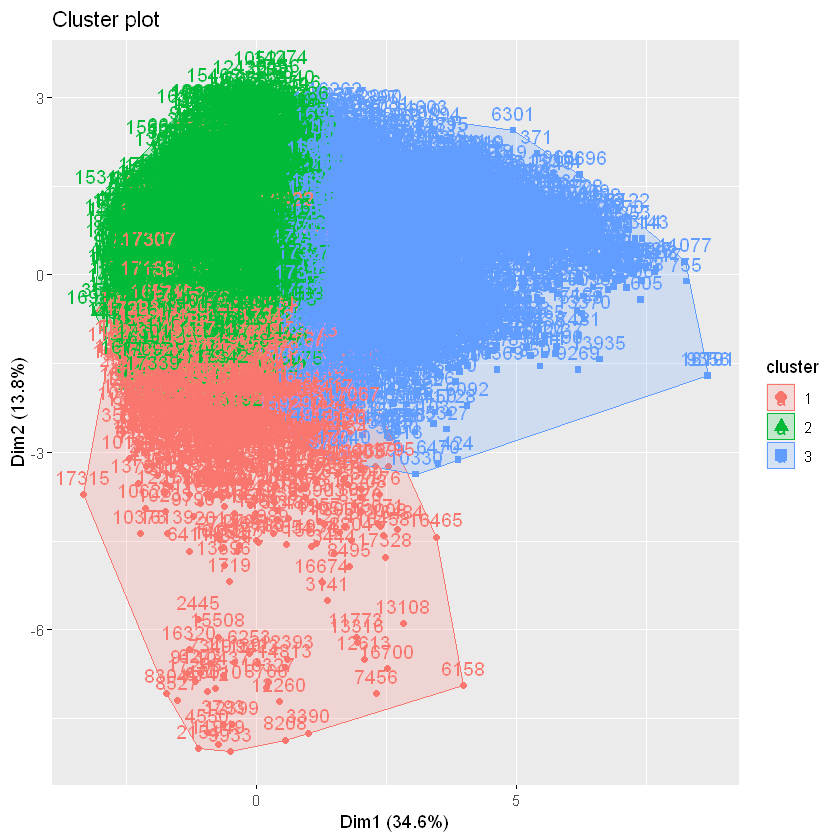

In [69]:
fviz_cluster(test_k3, data = test_data)

In [78]:
# for all songs of test_data which belong to the red cluster, we would recommend all songs in the same cluster but belonging to
# the train_data
# let's say we need songs that belong to cluster2
required_cluster <- 2
recommended_songs_id <- c()
for (i in c(1:length(cluster))) {
    if (cluster[i] == required_cluster) {
        recommended_songs_id <- c(recommended_songs_id, test_index + i - 1)
    }
}
length(recommended_songs_id)

[1] 45136

In [116]:
# there are 45136 songs similar to the song we liked, let's suggest the first 10 songs for an example
no_of_songs <- 10
recommended_songs <- c()
artists <- c()
for (i in recommended_songs_id) {
    if (length(recommended_songs) >= no_of_songs) {
        break
    }
    track_name <- labels[i, 2]
    droplevels(track_name)
    artist_name <- labels[i, 3]
    droplevels(artist_name)
    recommended_songs <- c(recommended_songs, toString(track_name))
    artists <- c(artists, toString(artist_name))
}
print("Recommended Songs: -")
for (i in c(1:length(artists))) {
    print(paste(recommended_songs[i], "-", artists[i]))
}

[1] "Recommended Songs"
[1] "Piece Of Me - The Word Alive"
[1] "Better in Boots - Tyler Farr"
[1] "Losers - The Weeknd"
[1] "More Of You - Colton Dixon"
[1] "Get to You - Michael Ray"
[1] "4ware - deadmau5"
[1] "Safe - Dumbfoundead"
[1] "Heard Em Say - Leikeli47"
[1] "Love Was Easy - Jason Aldean"
[1] "Closing Shot - LindstrÃ¸m"
